<a href="https://colab.research.google.com/github/season-code/Ai_labs/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import random

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=2)

In [3]:
model = Sequential()

model.add(InputLayer(shape=(4,)))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              24 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
history = model.fit(X_train,Y_train, epochs=50,validation_data=(X_test,Y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.3812 - loss: 1.2044 - val_accuracy: 0.4737 - val_loss: 1.1712
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4168 - loss: 1.2026 - val_accuracy: 0.4474 - val_loss: 1.1424
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3549 - loss: 1.2155 - val_accuracy: 0.4474 - val_loss: 1.1148
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3823 - loss: 1.2024 - val_accuracy: 0.4474 - val_loss: 1.0880
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4046 - loss: 1.1419 - val_accuracy: 0.4474 - val_loss: 1.0621
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4374 - loss: 1.0859 - val_accuracy: 0.5263 - val_loss: 1.0373
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4789 - loss: 1.0691 - val_accuracy: 0.5263 - val_loss: 1.0133
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4975 - loss: 1.0179 - val_accuracy: 0.5526 - val_loss: 0.9895

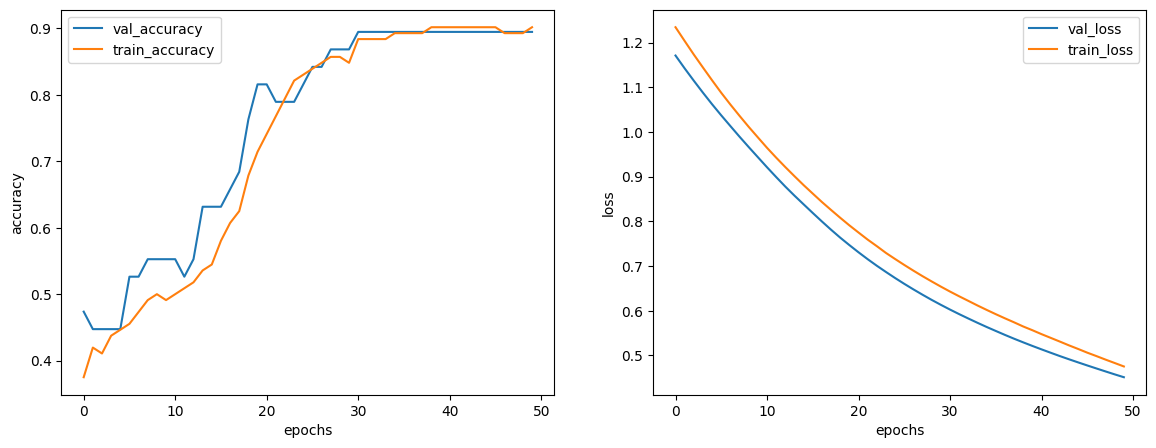

In [6]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['loss'],label='train_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()